<a href="https://colab.research.google.com/github/Susreesha/ML/blob/main/Susreesha_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/Hospital_Wait_Time_Dataset.csv')

In [ ]:
df

,Patient_ID,Age,Gender,Insurance_Type,Arrival_Mode,Department,Hospital_Capacity_Utilization,Current_Patient_Load,Available_Doctors,Available_Nurses,Day_of_Week,Time_of_Day,Previous_Visit_History,Weather_Condition,Wait_Time_Minutes
0,1,69.0,Male,Uninsured,Walk-in,Emergency,76.716374,65.0,5.0,8.0,Sunday,Morning,Frequent,Rainy,185.0
1,2,32.0,Female,Uninsured,Walk-in,Outpatient,74.828060,54.0,6.0,7.0,Sunday,Night,Frequent,Snowy,296.0
2,3,78.0,Male,Private,Walk-in,Emergency,69.480904,101.0,1.0,8.0,Monday,Morning,First-time,Clear,286.0
3,4,38.0,NaN,Private,Referral,Specialty,64.881759,134.0,5.0,5.0,Monday,Night,Frequent,Snowy,33.0
4,5,41.0,Female,Uninsured,Ambulance,NaN,54.999244,66.0,9.0,8.0,Monday,Evening,First-time,Clear,153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,52.0,Female,Uninsured,Ambulance,Emergency,63.296896,40.0,8.0,7.0,Wednesday,Night,Frequent,Rainy,8.0
96,97,82.0,Female,Uninsured,Referral,Specialty,68.017255,24.0,3.0,17.0,Thursday,Evening,Frequent,Rainy,214.0
97,98,64.0,Female,Government,Walk-in,Emergency,62.997493,111.0,5.0,10.0,Thursday,Morning,First-time,Snowy,165.0
98,99,20.0,Male,Government,Ambulance,Outpatient,72.662042,80.0,6.0,5.0,Thursday,Night,First-time,Clear,20.0


In [ ]:
df.shape

(100, 15)

In [ ]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Insurance_Type', 'Arrival_Mode',
       'Department', 'Hospital_Capacity_Utilization', 'Current_Patient_Load',
       'Available_Doctors', 'Available_Nurses', 'Day_of_Week', 'Time_of_Day',
       'Previous_Visit_History', 'Weather_Condition', 'Wait_Time_Minutes'],
      dtype='object')

In [ ]:
df=df.drop_duplicates(subset=['Patient_ID'])

In [ ]:
df.dtypes

,0
Patient_ID,int64
Age,float64
Gender,object
Insurance_Type,object
Arrival_Mode,object
Department,object
Hospital_Capacity_Utilization,float64
Current_Patient_Load,float64
Available_Doctors,float64
Available_Nurses,float64


In [ ]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Insurance_Type,0
Arrival_Mode,0
Department,0
Hospital_Capacity_Utilization,0
Current_Patient_Load,0
Available_Doctors,0
Available_Nurses,0


In [ ]:
for i in df.select_dtypes(include='object').columns:
  print(df[i].unique())

['Male' 'Female' nan 'F' 'male']
['Uninsured' 'Private' 'Government']
['Walk-in' 'Referral' 'Ambulance' nan]
['Emergency' 'Outpatient' 'Specialty' nan 'out' 'emer']
['Sunday' 'Monday' 'Tuesday' 'Saturday' 'Friday' 'Wednesday' 'Thursday'
 'Tue']
['Morning' 'Night' 'Evening' 'Afternoon' nan]
['Frequent' 'First-time' nan]
['Rainy' 'Snowy' 'Clear' nan]


In [ ]:
df=df.dropna(subset=['Patient_ID', 'Wait_Time_Minutes'])

In [ ]:
for i in df.select_dtypes(include=np.number).columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Gender']=df['Gender'].replace({'F':'Female'})

<ipython-input-12-f5b879e5126d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)


In [ ]:
df['Department'].fillna(df['Department'].mode()[0],inplace=True)
df['Department']=df['Department'].replace({'emer':'Emergency','out':'Outpatient'})

<ipython-input-13-f02186146cdb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Department'].fillna(df['Department'].mode()[0],inplace=True)


In [ ]:
df['Day_of_Week'].fillna(df['Day_of_Week'].mode()[0],inplace=True)
df['Day_of_Week']=df['Day_of_Week'].replace({'Tue':'Tuesday'})

<ipython-input-14-e78530659aca>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Day_of_Week'].fillna(df['Day_of_Week'].mode()[0],inplace=True)


In [ ]:
for i in ['Age','Hospital_Capacity_Utilization','Current_Patient_Load',
       'Available_Doctors', 'Available_Nurses']:
    df[i]=df[i].fillna(df[i].mean())

In [ ]:
for i in ['Gender', 'Insurance_Type', 'Arrival_Mode',
                   'Department', 'Day_of_Week', 'Time_of_Day',
                   'Previous_Visit_History', 'Weather_Condition']:
    df[i] = df[i].fillna(df[i].mode()[0])

In [ ]:
df= pd.get_dummies(df,columns=['Gender', 'Insurance_Type', 'Arrival_Mode',
       'Department','Time_of_Day','Previous_Visit_History', 'Weather_Condition'])

In [ ]:
df=df.drop(columns=['Patient_ID','Day_of_Week'])

In [ ]:
min_max_values={}
cols=['Age','Hospital_Capacity_Utilization', 'Current_Patient_Load',
       'Available_Doctors', 'Available_Nurses']
for i in cols:
    min_val=df[i].min()
    max_val=df[i].max()
    min_max_values[i]=(min_val,max_val)
    df[i]=(df[i]-min_val)/(max_val-min_val)

In [ ]:
min_max_values

{'Age': (18.0, 82.0),
 'Hospital_Capacity_Utilization': (51.61579756, 99.7965621),
 'Current_Patient_Load': (20.0, 148.0),
 'Available_Doctors': (1.0, 9.0),
 'Available_Nurses': (5.0, 19.0)}

In [ ]:
import json
with open('min_max_values.json','w') as json_file:
    json.dump(min_max_values,json_file)

In [ ]:
df.head()

,Age,Hospital_Capacity_Utilization,Current_Patient_Load,Available_Doctors,Available_Nurses,Wait_Time_Minutes,Gender_Female,Gender_Male,Gender_male,Insurance_Type_Government,...,Department_Specialty,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Previous_Visit_History_First-time,Previous_Visit_History_Frequent,Weather_Condition_Clear,Weather_Condition_Rainy,Weather_Condition_Snowy
0,0.796875,0.520967,0.351562,0.500,0.214286,185.0,False,True,False,False,...,False,False,False,True,False,False,True,False,True,False
1,0.218750,0.481774,0.265625,0.625,0.142857,296.0,True,False,False,False,...,False,False,False,False,True,False,True,False,False,True
2,0.937500,0.370793,0.632812,0.000,0.214286,286.0,False,True,False,False,...,False,False,False,True,False,True,False,True,False,False
3,0.312500,0.275337,0.890625,0.500,0.000000,33.0,True,False,False,False,...,True,False,False,False,True,False,True,False,False,True
4,0.359375,0.070224,0.359375,1.000,0.214286,153.0,True,False,False,False,...,False,False,True,False,False,True,False,True,False,False


In [ ]:
df.corr()

,Age,Hospital_Capacity_Utilization,Current_Patient_Load,Available_Doctors,Available_Nurses,Wait_Time_Minutes,Gender_Female,Gender_Male,Gender_male,Insurance_Type_Government,...,Department_Specialty,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Previous_Visit_History_First-time,Previous_Visit_History_Frequent,Weather_Condition_Clear,Weather_Condition_Rainy,Weather_Condition_Snowy
Age,1.000000,0.057601,0.044114,-0.283075,-0.021904,0.225601,0.059176,-0.024541,-0.167061,0.045739,...,0.136767,0.244810,-0.090686,-0.032772,-0.111482,0.097471,-0.097471,0.066605,-0.082185,2.356095e-02
Hospital_Capacity_Utilization,0.057601,1.000000,-0.003745,0.031854,0.189482,0.015309,-0.006548,-0.019533,0.125668,-0.077773,...,0.086585,0.121185,-0.028958,0.074570,-0.184018,0.155976,-0.155976,0.038079,-0.040484,6.006155e-03
Current_Patient_Load,0.044114,-0.003745,1.000000,0.042486,0.017969,0.024146,0.031600,-0.012899,-0.090200,0.064394,...,-0.145762,0.092786,0.012802,-0.069303,-0.027049,0.140534,-0.140534,0.050950,-0.001087,-5.289317e-02
Available_Doctors,-0.283075,0.031854,0.042486,1.000000,0.047985,0.007704,-0.128751,0.095369,0.161264,-0.107925,...,-0.027297,-0.081319,0.112122,-0.071660,0.043574,-0.238040,0.238040,-0.039757,0.030192,7.591240e-03
Available_Nurses,-0.021904,0.189482,0.017969,0.047985,1.000000,-0.052151,0.137939,-0.173106,0.168946,-0.117218,...,0.201031,0.174807,-0.160746,0.045172,-0.053092,-0.212332,0.212332,-0.019904,0.055384,-4.242318e-02
Wait_Time_Minutes,0.225601,0.015309,0.024146,0.007704,-0.052151,1.000000,0.112247,-0.102463,-0.047521,0.037711,...,0.002894,0.031012,-0.005517,0.155851,-0.215823,0.022422,-0.022422,0.035645,0.036278,-7.951993e-02
Gender_Female,0.059176,-0.006548,0.031600,-0.128751,0.137939,0.112247,1.000000,-0.978472,-0.107133,0.170414,...,0.131228,0.015764,0.011157,0.053504,-0.094389,0.022711,-0.022711,-0.061639,-0.041370,1.129865e-01
Gender_Male,-0.024541,-0.019533,-0.012899,0.095369,-0.173106,-0.102463,-0.978472,1.000000,-0.100366,-0.201816,...,-0.165990,-0.004674,0.002127,-0.084065,0.104816,-0.001894,0.001894,0.076076,0.017131,-1.005038e-01
Gender_male,-0.167061,0.125668,-0.090200,0.161264,0.168946,-0.047521,-0.107133,-0.100366,1.000000,0.150700,...,0.167019,-0.053480,-0.064034,0.147049,-0.049908,-0.100366,0.100366,-0.069338,0.116916,-6.052275e-02
Insurance_Type_Government,0.045739,-0.077773,0.064394,-0.107925,-0.117218,0.037711,0.170414,-0.201816,0.150700,1.000000,...,0.078363,-0.125764,-0.112176,0.190889,0.027273,0.076690,-0.076690,-0.208141,0.122711,8.032193e-02


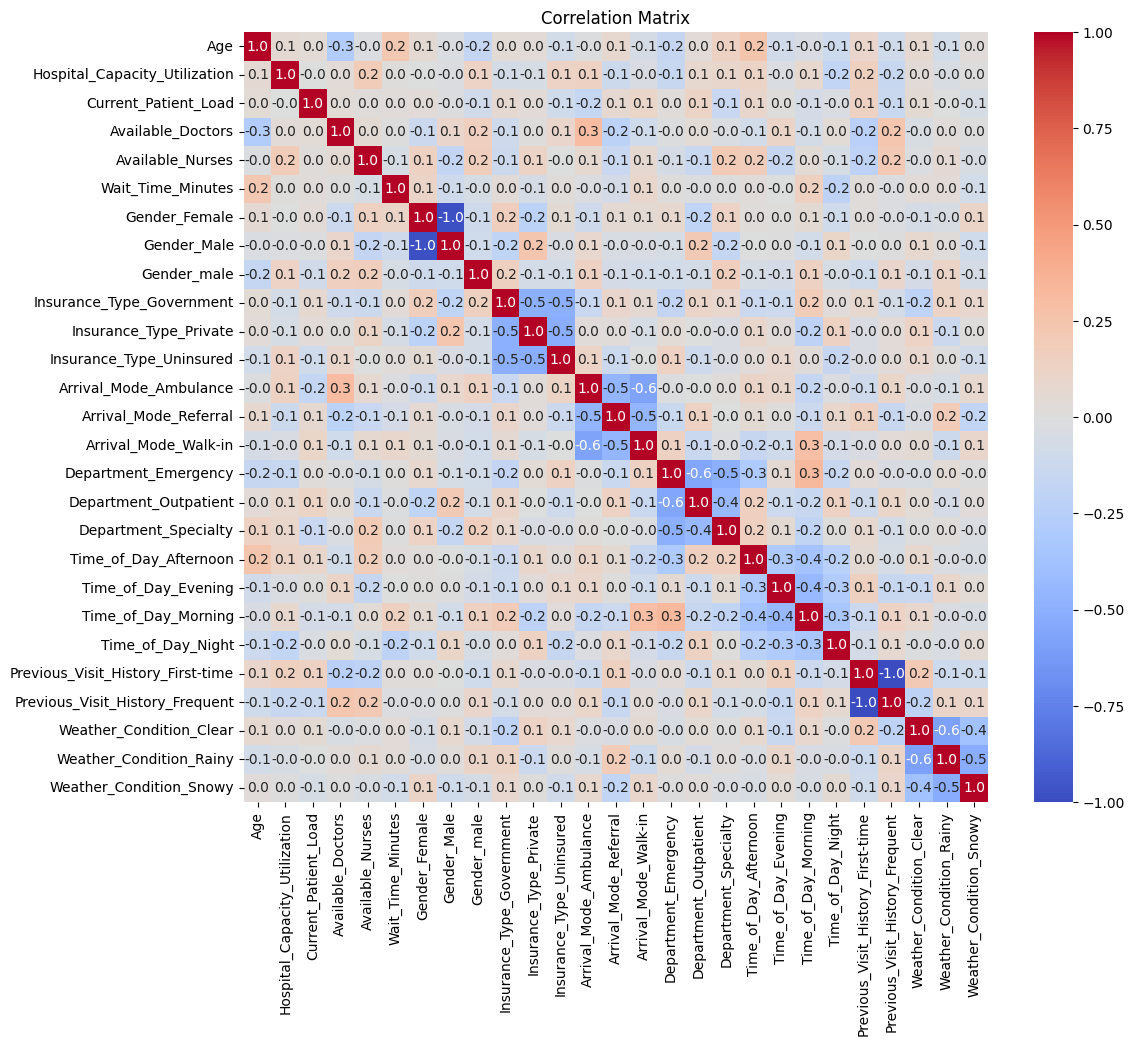

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
Correlation_matrix = df.corr()
sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm',fmt='.1f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
x=df.drop(columns=['Wait_Time_Minutes','Department_Emergency','Arrival_Mode_Ambulance'],axis=1)
y=df['Wait_Time_Minutes']

In [ ]:
y.value_counts()

,count
Wait_Time_Minutes,
112.0,3
21.0,2
102.0,2
20.0,2
135.0,2
...,...
61.0,1
296.0,1
84.0,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 140.24429940784856
R2 Score: -1.0679574408269414


In [ ]:
pd.DataFrame(x.columns,reg.coef_)

,0
99.435072,Age
14.751365,Hospital_Capacity_Utilization
-61.262043,Current_Patient_Load
18.662847,Available_Doctors
-21.836374,Available_Nurses
26.628816,Gender_Female
5.690254,Gender_Male
-32.319070,Gender_male
-0.989474,Insurance_Type_Government
18.649427,Insurance_Type_Private
